In [3]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import scipy.constants as sc
from scipy.optimize import curve_fit

In [4]:
def func_linear(x, *args):
    return args[0] + 0*x
def func_gauss(x, *args):
    # f(x) = a + bx + gauss(x)
    # 0: base
    # 1: linear 
    # 2: top - base
    # 3: peak in x-axis
    # 4: sigma 

    # return args[0] + x*args[1] +  args[2] * np.exp(-(x - args[3]) ** 2 / (2 * args[4] ** 2)) # f(x) = a + bx + gauss(x)
    return (args[0] + args[1] * np.exp(-(x - args[2]) ** 2 / (2 * args[3] ** 2)))


In [5]:
data = np.genfromtxt('QHallEffekt.lvm', skip_header=22, unpack = True)
B = data[0]
Rl = data[1]
Rh = data[2]
t = data[3]

rk = sc.Planck / sc.elementary_charge**2
n = np.array([2,4,6,8,12])
rh_t = rk/n

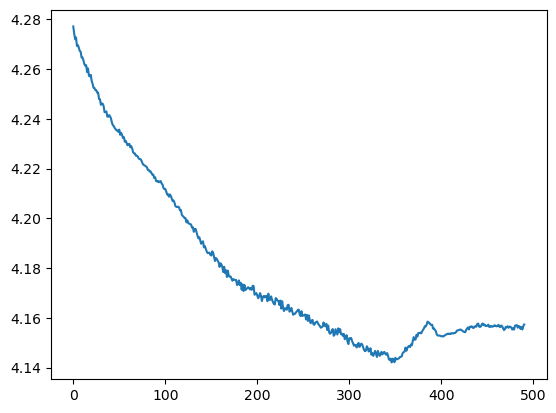

In [6]:
plt.plot(t)
plt.show()

In [4]:
print(rh_t)

[12906.40372965  6453.20186483  4302.13457655  3226.60093241
  2151.06728828]


In [8]:
a = [[], [], [], [], []]
x = [[], [], [], [], []]
popt = [[], [], [], [], []]
pcov = [[], [], [], [], []]
perr = [[], [], [], [], []]
nu = np.zeros(len(a))
nu_err = np.zeros(len(a))
r = [[8.678, 9], [4.375, 4.967], [2.971, 3.189], [2.222, 2.387], [1.437, 1.536]]
for i in range(0, len(a)):
    for j in range(0, len(Rh)):
        if r[i][0] <= B[j] <= r[i][1]:
            a[i].append(Rh[j])
            x[i].append(B[j])
    a[i] = np.array(a[i])
    x[i] = np.array(x[i])
    p_guess = np.mean(a[i])
    popt[i], pcov[i] = curve_fit(func_linear, x[i], a[i], p0 = p_guess)
    perr[i] = np.sqrt(np.diag(pcov[i]))
    nu[i] = rk/popt[i]
    nu_err[i] = nu[i]*np.sqrt(perr[i] / popt[i]) 



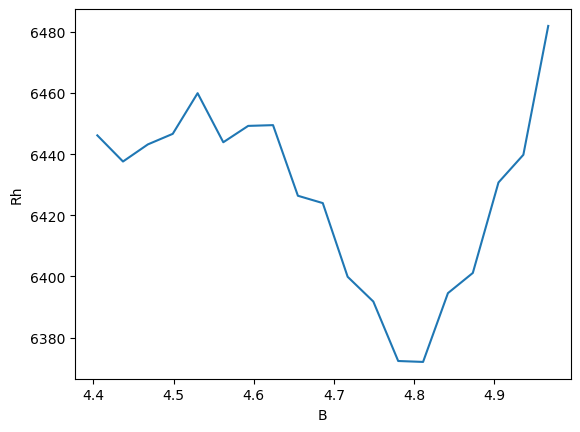

In [28]:
plt.plot(x[1], a[1])
plt.xlabel('B')
plt.ylabel('Rh')
plt.show()

In [46]:

print('B: ',np.mean(x[1]) )
n = 4 * sc.elementary_charge * np.mean(x[1]) / sc.Planck
print('n = ', np.round(n, 5))
mu = 1 / (n * sc.elementary_charge * 37.88157915789474)
print('mu = ', mu)

B:  4.686263157894737
n =  4532533560547348.0
mu =  36.351346540742476


In [42]:
n = x[1] / (a[1] * sc.elementary_charge)
print(n)
mu = 1 / (n * sc.elementary_charge * 37.88157915789474)
print('mu = ', mu)

[4.26515779e+15 4.30184777e+15 4.32813863e+15 4.35583586e+15
 4.37681965e+15 4.41871602e+15 4.44505191e+15 4.47488000e+15
 4.52107316e+15 4.55288160e+15 4.60025915e+15 4.63733636e+15
 4.68185414e+15 4.71243957e+15 4.72611631e+15 4.75147022e+15
 4.76065808e+15 4.78401319e+15 4.78275438e+15]
mu =  [38.5097684  38.18132288 37.94939414 37.70808729 37.52730338 37.17148559
 36.95125327 36.70494824 36.32992277 36.07610588 35.70456219 35.41909105
 35.08230585 34.85460905 34.75374449 34.56829804 34.50158278 34.33314926
 34.34218564]


In [5]:
title = 'Hallwiderstand'
fig = go.Figure()

fig.add_trace(go.Scatter(x = B, y = Rh, name = title))
for i in range(0, len(a)):
    fig.add_trace(go.Scatter(x = x[i], y = func_linear(x[i], *popt[i]), mode='lines',
    name ='Plateaus{}: R_h = {} \u00B1 {}, \u03BD = {} \u00B1 {}'
    .format(i, "%.2f" % popt[i][0], "%.2f" % perr[i][0], "%.2f" % nu[i], "%.2f" % nu_err[i])))

fig.update_layout(
            title = title,
            xaxis_title = 'B in testla',
            yaxis_title = 'Widerstand in Ohm',
            width=750, height=500,          
            showlegend=True,
            font=dict(
                family="Courier New, monospace",
                size=10,),
            legend=dict(
                yanchor="top", y=0.99,
                xanchor="left", x=0.01))

fig.write_html('pdf/HW.html')
fig.write_image('pdf/HW.pdf')
fig.show()

NameError: name 'x' is not defined

In [ ]:
for i in range(0, len(rhall)):
    print(np.round_(rhall[i], 2), np.round_(rhall_err[i], 2))

In [ ]:

print(np.round_(rhall, 2))
print(np.round_(rhall_err, 2))

In [14]:
# A5 theorie vergleich: 
rhall = np.empty(len(popt))
rhall_err = np.empty(len(popt))
for i in range(0, len(rhall)):
    rhall[i] = popt[i]
    rhall_err[i] = perr[i]
theorie_vergleich = (rhall-rh_t)/rh_t*100
print(theorie_vergleich)

[-0.06663742 -0.40774126 -0.35556873 -0.33113124 -1.64998571]


In [ ]:
# A6 Ladungstraegerdichte n und Beweglighkeit
n = 4*

In [34]:
# A7 Feinstrukturkonstanten alpha
nu = np.array([2, 4, 6, 8, 12])
alpha = 1 / (2*sc.speed_of_light*sc.epsilon_0 * rhall * nu)
print(alpha)
print(np.round(np.mean(alpha), 8))
print((1/137-np.mean(alpha))*137*100 )
print(np.round(1/137, 8))

[0.00730222 0.00732723 0.00732339 0.0073216  0.00741978]
0.00733884
-0.5421465008508827
0.00729927


In [45]:
b = []
r = []
for i in range(0, len(Rl)):
    if 0 <= B[i] <= 0.7:
        b.append(B[i])
        r.append(Rl[i])
r = np.array(r)
print(np.mean(r))

37.88157915789474


In [6]:
title = 'Langewiderstand'
fig = go.Figure()

fig.add_trace(go.Scatter(x = B, y = Rl, name ='Langewiderstand'))

fig.update_layout(
            title = title,
            xaxis_title = 'B in testla',
            yaxis_title = 'Widerstand in Ohm',
            width=750, height=500,          
            showlegend=True,
            font=dict(
                family="Courier New, monospace",
                size=10,),
            legend=dict(
                yanchor="top", y=0.99,
                xanchor="left", x=0.01))

fig.write_html('pdf/LW.html')
fig.write_image('pdf/LW.pdf')

fig.show()